# Assignment 1 - Filtering Performance Comparison

Testing three different ways to filter the band gap data and comparing their speed.

In [38]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

## Load the data

In [39]:
# Load band gap data
bgdata = pd.read_json('../data/band_gap_data.json')
print(f"Total rows: {len(bgdata)}")
bgdata.head()

Total rows: 1459


,chemical_formula,crystallinity,band_gap,band_gap_units,band_gap_type,temperature_K,exp_method,data_type
0,Li1F1,Single crystalline,13.60,eV,Direct,300.0,Reflection,EXPERIMENTAL
1,Li1F1,Single crystalline,12.61,eV,Excitonic,300.0,Reflection,EXPERIMENTAL
2,Li1F1,Single crystalline,12.60,eV,Excitonic,NaN,Estimated,EXPERIMENTAL
3,Li1F1,Single crystalline,12.10,eV,None,77.0,Absorption,EXPERIMENTAL
4,Li1F1,Single crystalline,12.00,eV,None,200.0,Absorption,EXPERIMENTAL


In [40]:
# Check what columns we have
bgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chemical_formula  1459 non-null   object 
 1   crystallinity     1285 non-null   object 
 2   band_gap          1447 non-null   float64
 3   band_gap_units    1447 non-null   object 
 4   band_gap_type     596 non-null    object 
 5   temperature_K     1220 non-null   float64
 6   exp_method        1318 non-null   object 
 7   data_type         1447 non-null   object 
dtypes: float64(2), object(6)
memory usage: 91.3+ KB


In [41]:
# Look at unique values for the columns we need
print("Unique crystallinity values:")
print(bgdata['crystallinity'].unique())
print("\nUnique exp_method values:")
print(bgdata['exp_method'].unique())

Unique crystallinity values:
['Single crystalline' 'Polycrystalline' None 'Amorphous']

Unique exp_method values:
['Reflection' 'Estimated' 'Absorption' 'Thermal activation' None 'SCOPW'
 'Photoconduction' 'APW' 'Electroreflection' 'Magnetoreflection'
 'Magnetoabsorption']


## Method 1: Boolean Mask

Using boolean indexing - this is what we learned in class

In [42]:
# Method 1: Boolean mask
start = time.time()

# Apply all three filters
filtered_bool = bgdata[(bgdata['temperature_K'] > 50) & 
                       (bgdata['crystallinity'] == 'Polycrystalline') & 
                       (bgdata['exp_method'] == 'Reflection')]

time_bool = time.time() - start

print(f"Boolean mask method:")
print(f"  Rows found: {len(filtered_bool)}")
print(f"  Time taken: {time_bool:.6f} seconds")

Boolean mask method:
  Rows found: 46
  Time taken: 0.001152 seconds


In [43]:
# Check the results
filtered_bool.head()

,chemical_formula,crystallinity,band_gap,band_gap_units,band_gap_type,temperature_K,exp_method,data_type
282,Sc2O3,Polycrystalline,5.40,eV,None,300.0,Reflection,EXPERIMENTAL
321,Cr2O3,Polycrystalline,1.62,eV,None,300.0,Reflection,EXPERIMENTAL
355,Fe2O3,Polycrystalline,2.20,eV,None,300.0,Reflection,EXPERIMENTAL
383,Ni1O1,Polycrystalline,4.00,eV,None,300.0,Reflection,EXPERIMENTAL
397,Cu2O1,Polycrystalline,2.02,eV,None,300.0,Reflection,EXPERIMENTAL


## Method 2: For-loop with iat

Going through each row and using iat to access values

In [44]:
# Method 2: For-loop with iat
start = time.time()

# Find column positions first
temp_col = bgdata.columns.get_loc('temperature_K')
crys_col = bgdata.columns.get_loc('crystallinity')
method_col = bgdata.columns.get_loc('exp_method')

# Store indices of rows that match
matching_rows = []

for i in range(len(bgdata)):
    temp = bgdata.iat[i, temp_col]
    crys = bgdata.iat[i, crys_col]
    method = bgdata.iat[i, method_col]
    
    # Check if all conditions are met
    if temp is not None and temp > 50 and crys == 'Polycrystalline' and method == 'Reflection':
        matching_rows.append(i)

filtered_iat = bgdata.iloc[matching_rows]
time_iat = time.time() - start

print(f"For-loop with iat method:")
print(f"  Rows found: {len(filtered_iat)}")
print(f"  Time taken: {time_iat:.6f} seconds")

For-loop with iat method:
  Rows found: 46
  Time taken: 0.021917 seconds


## Method 3: Using iloc

Similar to iat but using iloc to get the full row each time

In [45]:
# Method 3: Using iloc
start = time.time()

matching_rows = []

for i in range(len(bgdata)):
    row = bgdata.iloc[i]
    
    temp = row['temperature_K']
    if temp is not None and temp > 50 and \
       row['crystallinity'] == 'Polycrystalline' and \
       row['exp_method'] == 'Reflection':
        matching_rows.append(i)

filtered_iloc = bgdata.iloc[matching_rows]
time_iloc = time.time() - start

print(f"iloc method:")
print(f"  Rows found: {len(filtered_iloc)}")
print(f"  Time taken: {time_iloc:.6f} seconds")

iloc method:
  Rows found: 46
  Time taken: 0.020129 seconds


## Compare the results

Make sure all three methods gave us the same answer

In [46]:
# Check if they all found the same number of rows
print(f"Boolean mask: {len(filtered_bool)} rows")
print(f"For-loop iat: {len(filtered_iat)} rows")
print(f"iloc method: {len(filtered_iloc)} rows")
print(f"\nAll methods match: {len(filtered_bool) == len(filtered_iat) == len(filtered_iloc)}")

Boolean mask: 46 rows
For-loop iat: 46 rows
iloc method: 46 rows

All methods match: True


## Run multiple times to get better timing

Running each method 10 times to get more accurate measurements

In [47]:
n_runs = 10

# Test boolean mask multiple times
times_bool = []
for _ in range(n_runs):
    start = time.time()
    result = bgdata[(bgdata['temperature_K'] > 50) & 
                    (bgdata['crystallinity'] == 'Polycrystalline') & 
                    (bgdata['exp_method'] == 'Reflection')]
    times_bool.append(time.time() - start)

# Test iat method multiple times
times_iat = []
temp_col = bgdata.columns.get_loc('temperature_K')
crys_col = bgdata.columns.get_loc('crystallinity')
method_col = bgdata.columns.get_loc('exp_method')

for _ in range(n_runs):
    start = time.time()
    matching_rows = []
    for i in range(len(bgdata)):
        temp = bgdata.iat[i, temp_col]
        crys = bgdata.iat[i, crys_col]
        method = bgdata.iat[i, method_col]
        if temp is not None and temp > 50 and crys == 'Polycrystalline' and method == 'Reflection':
            matching_rows.append(i)
    result = bgdata.iloc[matching_rows]
    times_iat.append(time.time() - start)

# Test iloc method multiple times
times_iloc = []
for _ in range(n_runs):
    start = time.time()
    matching_rows = []
    for i in range(len(bgdata)):
        row = bgdata.iloc[i]
        temp = row['temperature_K']
        if temp is not None and temp > 50 and \
           row['crystallinity'] == 'Polycrystalline' and \
           row['exp_method'] == 'Reflection':
            matching_rows.append(i)
    result = bgdata.iloc[matching_rows]
    times_iloc.append(time.time() - start)

print(f"Average times over {n_runs} runs:")
print(f"Boolean mask: {np.mean(times_bool):.6f} seconds")
print(f"For-loop iat: {np.mean(times_iat):.6f} seconds")
print(f"iloc method:  {np.mean(times_iloc):.6f} seconds")

Average times over 10 runs:
Boolean mask: 0.000499 seconds
For-loop iat: 0.021713 seconds
iloc method:  0.019854 seconds


## Summary table

In [48]:
# Create summary dataframe
summary = pd.DataFrame({
    'Method': ['Boolean Mask', 'For-loop with iat', 'iloc'],
    'Mean Time (s)': [np.mean(times_bool), np.mean(times_iat), np.mean(times_iloc)],
    'Std Dev (s)': [np.std(times_bool), np.std(times_iat), np.std(times_iloc)]
})

print(summary.to_string(index=False))

           Method  Mean Time (s)  Std Dev (s)
     Boolean Mask       0.000499     0.000237
For-loop with iat       0.021713     0.000243
             iloc       0.019854     0.000379


## Plot the results

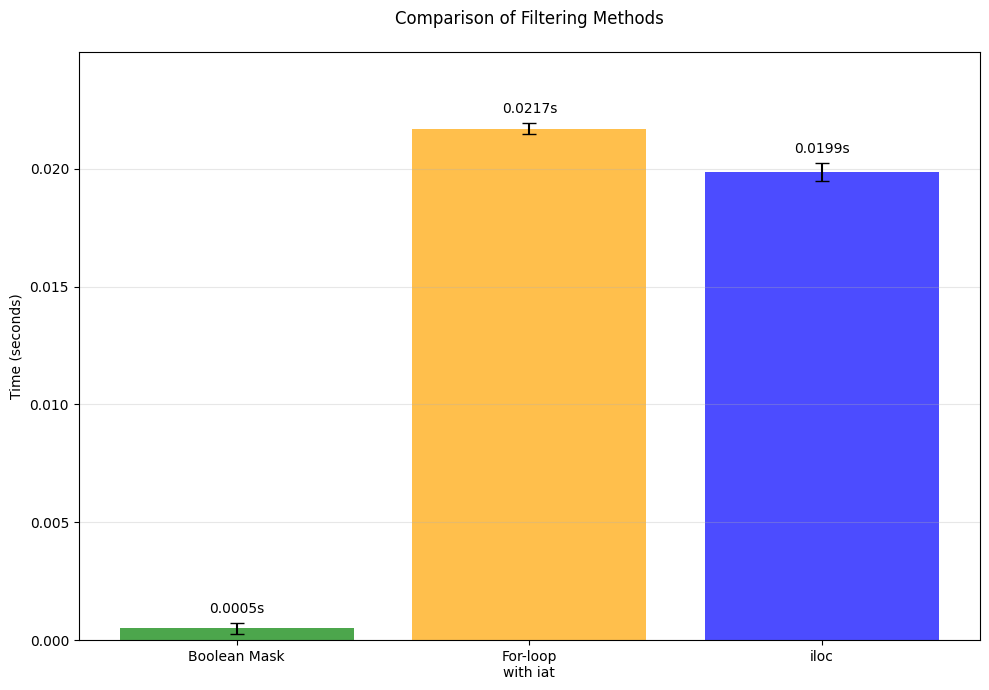

Figure saved!


In [49]:
# Bar chart comparing the three methods
methods = ['Boolean Mask', 'For-loop\nwith iat', 'iloc']
avg_times = [np.mean(times_bool), np.mean(times_iat), np.mean(times_iloc)]
std_times = [np.std(times_bool), np.std(times_iat), np.std(times_iloc)]

plt.figure(figsize=(10, 7))  # Increased height from 6 to 7
bars = plt.bar(methods, avg_times, yerr=std_times, capsize=5, alpha=0.7, color=['green', 'orange', 'blue'])
plt.ylabel('Time (seconds)')
plt.title('Comparison of Filtering Methods', pad=20)  # Added padding to title
plt.grid(axis='y', alpha=0.3)

# Add the actual values on top of bars - moved down slightly
for i, (avg, std) in enumerate(zip(avg_times, std_times)):
    plt.text(i, avg + std + max(avg_times)*0.02, f'{avg:.4f}s', ha='center', fontsize=10)

# Add some space at the top
plt.ylim(0, max(avg_times) * 1.15)  # Give 15% extra space at top

plt.tight_layout()
plt.savefig('../results/figures/assignment1_performance_comparison.png', dpi=150)
plt.show()

print("Figure saved!")

## Conclusions

The boolean mask method is way faster than the other two. The for-loop methods are much slower because they have to go through each row one by one. 

Boolean masking is definitely the best approach for filtering dataframes in pandas.